### Importing darkflow

In [1]:
from darkflow.net.build import TFNet
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Defining model

In [2]:
options = {
    "model": "yolo.cfg",
    "load": "./yolo.weights",
    "threshold": 0.1,
    "gpu": 1.0
}

tfnet = TFNet(options)


/usr/local/lib/python3.6/dist-packages/darkflow/dark/darknet.py:54: UserWarning: ./cfg/yolo.cfg not found, use yolo.cfg instead
  cfg_path, FLAGS.model))


Parsing yolo.cfg
Loading ./yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.15806245803833008s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  lea

### Predicting results

In [ ]:
# image = np.array(Image.open('human.jpg'))
# results = tfnet.return_predict(image)

### Drawing Boxes

In [3]:
def boxing(originalImage, predictions, thresholdConfidence = 0.5):
    newImage = np.copy(originalImage)
    
    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']
        
        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']
        
        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))
        
        if confidence > thresholdConfidence:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_TRIPLEX, 0.8, (0,0,255), 1, cv2.LINE_AA)
    return newImage

### Visualising Results

In [ ]:
# _, ax = plt.subplots(figsize = (20,10))
# ax.imshow(boxing(image, results, 0.5))

### Combining in single function

In [4]:
def predict(imageName, thresholdConfidence = 0.5):
    image = np.array(Image.open(imageName))
    results = tfnet.return_predict(image)
        
    _, ax = plt.subplots(figsize = (20,10))
    ax.imshow(boxing(image, results, thresholdConfidence))

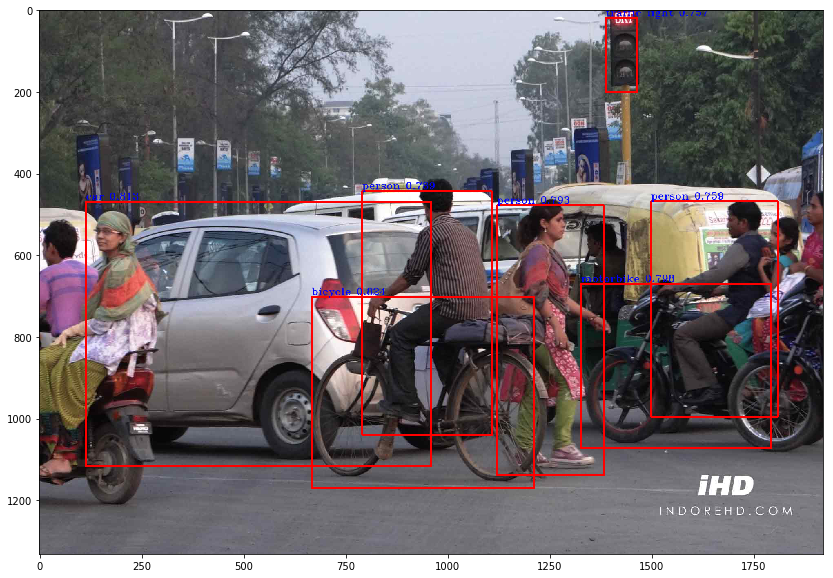

In [5]:
predict('traffic.jpg', 0.75)

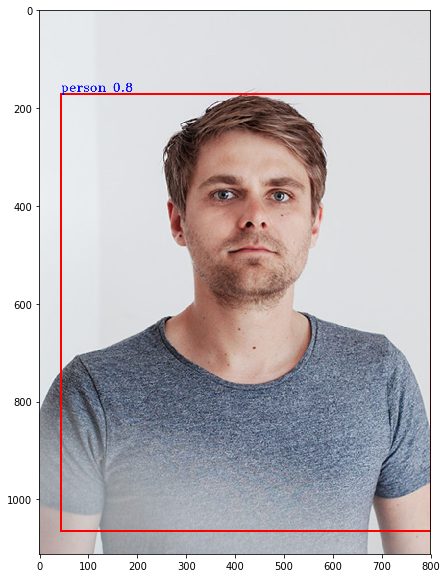

In [6]:
predict('human.jpg',0.7)

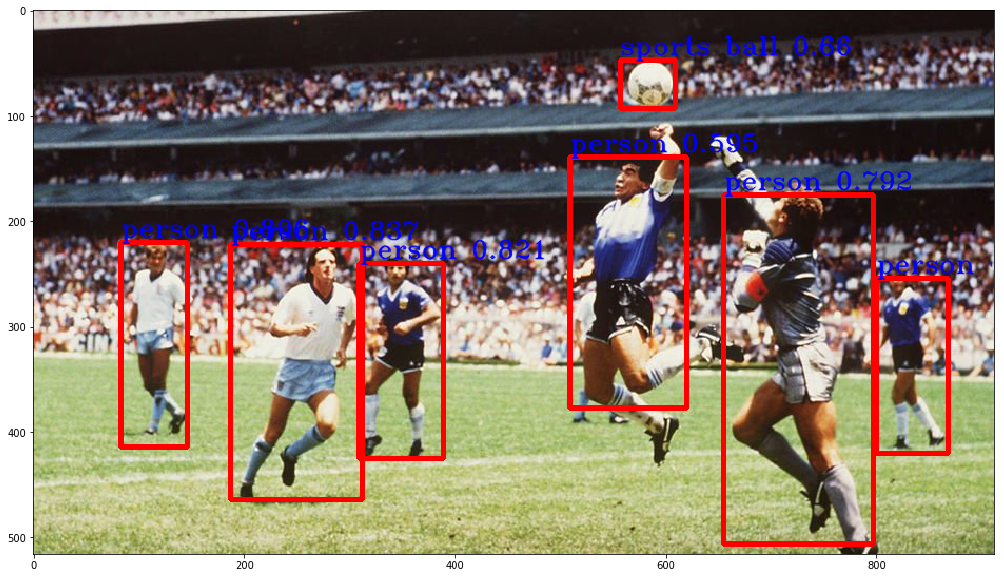

In [7]:
predict('handofgod.jpg')